<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/class/Basic_Exaples_20160908.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic uses of SOMPY library
http://www.vahidmoosavi.com


https://github.com/sevamoo/sompy


In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

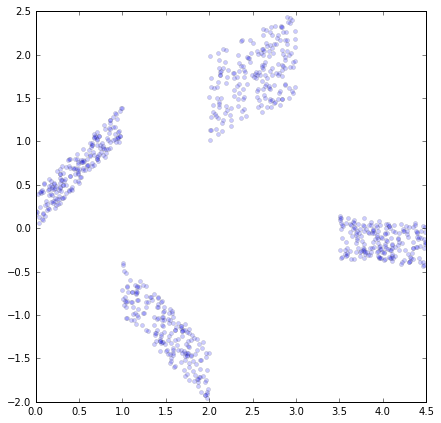

In [ ]:
### A toy example: two dimensional data, four clusters

dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)




In [ ]:

mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.047000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.008000, quantization error: 0.230682

 epoch: 2 ---> elapsed time:  0.006000, quantization error: 0.111277

 epoch: 3 ---> elapsed time:  0.007000, quantization error: 0.076385

 epoch: 4 ---> elapsed time:  0.007000, quantization error: 0.073312

 epoch: 5 ---> elapsed time:  0.007000, quantization error: 0.067887

 epoch: 6 ---> elapsed time:  0.007000, quantization error: 0.063400

 epoch: 7 ---> elapsed time:  0.006000, quantization error: 0.059976

 epoch: 8 ---> elapsed time:  0.007000, quantization error: 0.056107

 epoch: 9 ---> elapsed time:  0.007000, quantization error: 0.052724

 epoch: 10 ---> elapsed time:  0.007000, quantization error: 0.049561

 epoch: 11 ---> elapsed time:  0.007000, quantization error: 0.046435

 epoch: 12 ---> elapsed time:  0.007000, quantization error: 0.043389

 epoch: 13 --

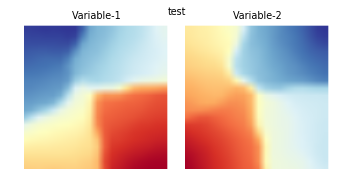

In [ ]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

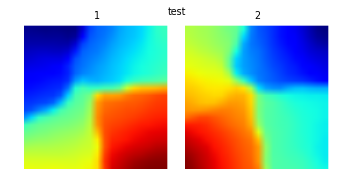

In [ ]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default


In [ ]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

[0 1 2 3]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3,

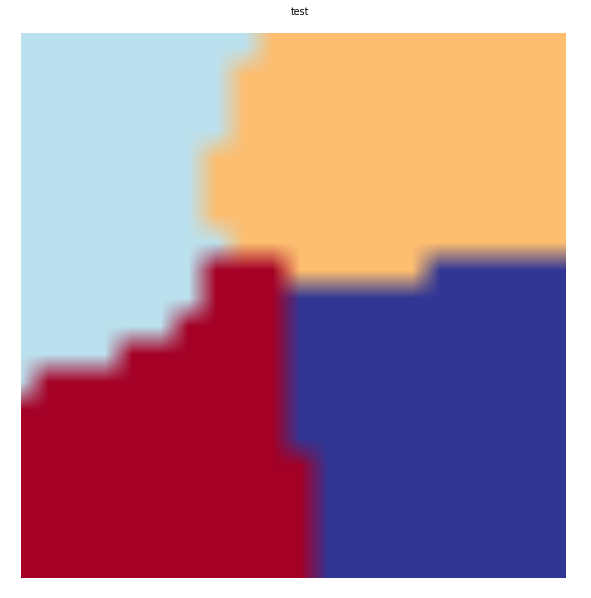

In [ ]:
v.show(som, what='cluster')

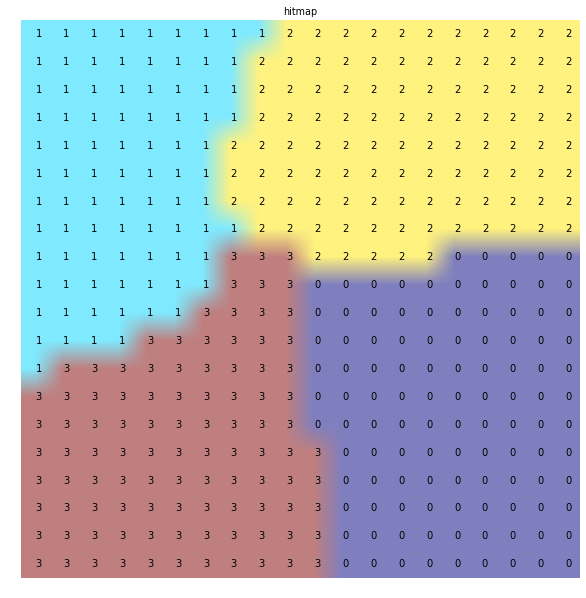

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ..., 
       [ 19,  17, 397],
       [ 19,  18, 398],
       [ 19,  19, 399]])

In [ ]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

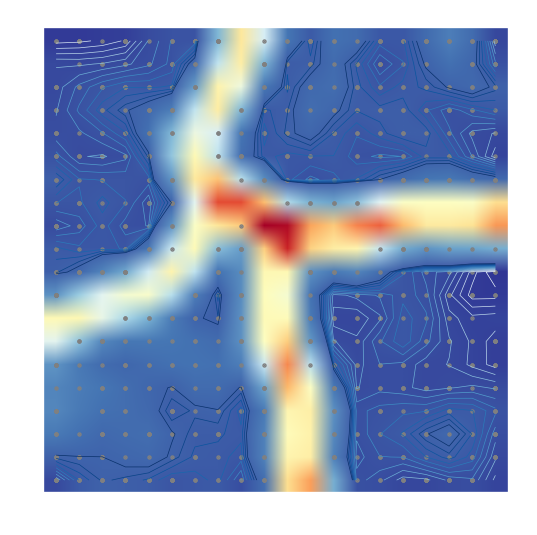

In [ ]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


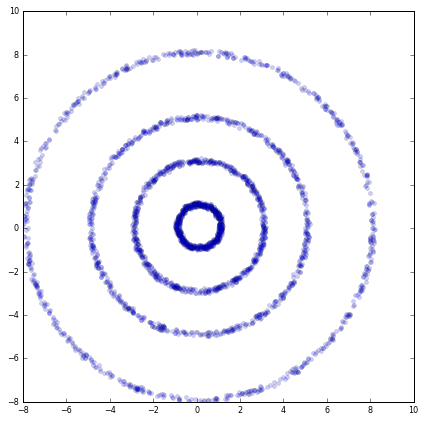

In [ ]:
dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)



Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)

fig = plt.figure()
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)
# plt.plot(np.cos(tetha))

In [ ]:

mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
 pca_linear_initialization took: 0.010000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.039000, quantization error: 0.353470

 epoch: 2 ---> elapsed time:  0.038000, quantization error: 0.226071

 epoch: 3 ---> elapsed time:  0.043000, quantization error: 0.184173

 epoch: 4 ---> elapsed time:  0.038000, quantization error: 0.167240

 epoch: 5 ---> elapsed time:  0.040000, quantization error: 0.144255

 epoch: 6 ---> elapsed time:  0.040000, quantization error: 0.122402

 epoch: 7 ---> elapsed time:  0.040000, quantization error: 0.099768

 epoch: 8 ---> elapsed time:  0.038000, quantization error: 0.077293

 epoch: 9 ---> elapsed time:  0.036000, quantization error: 0.056513

 epoch: 10 ---> elapsed time:  0.036000, quantization error: 0.039062

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 13

 epoch: 1 ---> elapsed time:  0.036000, quantization error: 0.028419

 

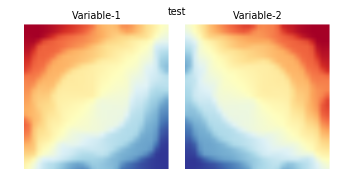

In [ ]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

[0 1 2 3]


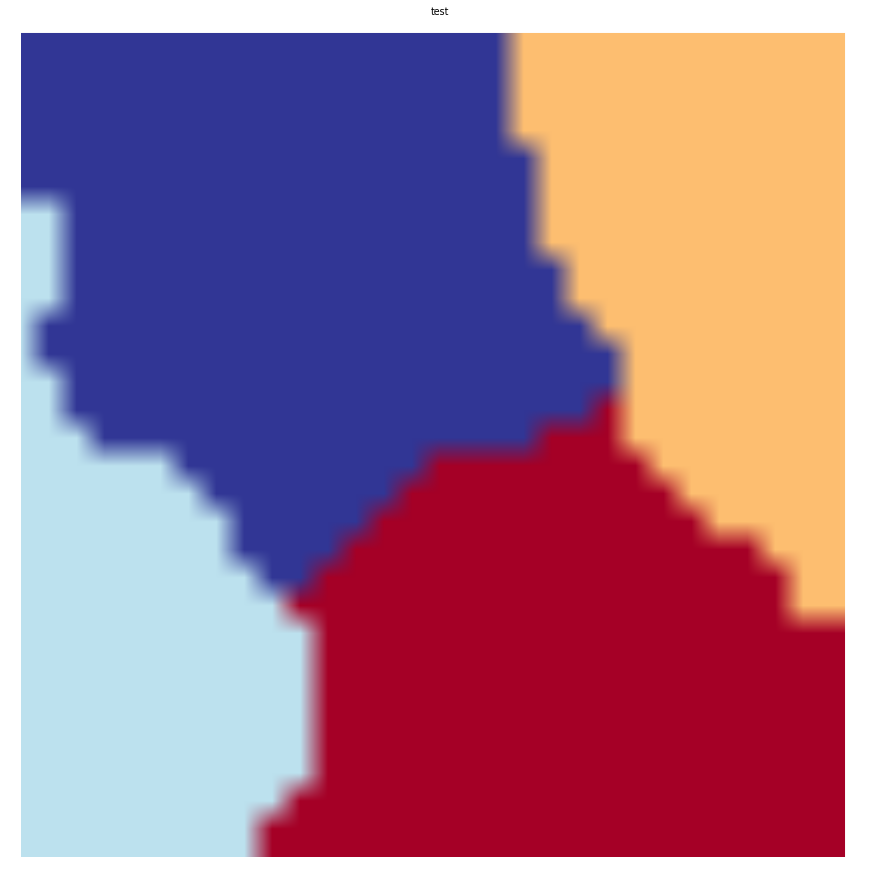

In [ ]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
# v.save('kmeans_test')

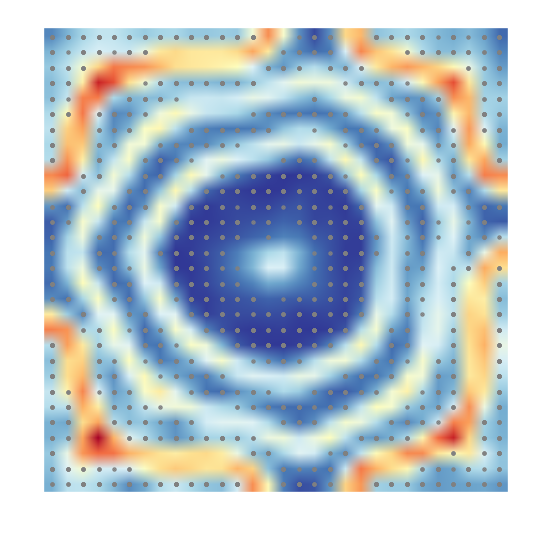

In [ ]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)
